# 1. Prétraitement des Données

In [3]:
import pandas as pd

# Charger les données historiques des prix de l'indice MASI
Indice_MASI = pd.read_excel("/content/drive/MyDrive/Etude de cas IDA Tech/Dataset.xlsx", sheet_name="Indices Généraux")
Indice_MASI
# Charger les données macroéconomiques
#macroeconomiques = pd.read_excel("chemin/vers/votre/fichier/Dataset.xls", sheet_name="Donnees_Macro")

# Charger les données d'autres indices
#autres_indices = pd.read_excel("chemin/vers/votre/fichier/Dataset.xls", sheet_name="Donnees_Autres_Indices")


,SEANCE,INDICE,COURS_CLOTURE,COURS_PLUS_HAUT,COURS_PLUS_BAS,COURS_OUVERTURE,COURS_VEILLE,VARIATION
0,2023-12-08 00:00:00.000,MASI,11885.32,11885.32,11824.97,11827.02,11827.02,0.490000
1,2023-12-07 00:00:00.000,MASI,11827.02,11827.02,11757.60,11757.60,11757.60,0.590000
2,2023-12-06 00:00:00.000,MASI,11757.60,11792.95,11718.07,11759.51,11759.51,-0.020000
3,2023-12-05 00:00:00.000,MASI,11759.51,11785.10,11709.49,11728.06,11728.06,0.270000
4,2023-12-04 00:00:00.000,MASI,11728.06,11769.43,11702.27,11748.19,11748.19,-0.170000
...,...,...,...,...,...,...,...,...
2361,2013-12-12 00:00:00.000,MASI,9320.66,9320.66,9241.91,9241.91,9252.30,0.007388
2362,2013-12-11 00:00:00.000,MASI,9252.30,9252.30,9194.57,9239.97,9241.40,0.001179
2363,2013-12-10 00:00:00.000,MASI,9241.40,9263.15,9196.77,9203.46,9221.40,0.002169
2364,2013-12-09 00:00:00.000,MASI,9221.40,9277.00,9199.47,9235.06,9240.41,-0.002057


In [4]:
# Check for empty rows
Indice_MASI.isnull().any(axis=1)

0       False
1       False
2       False
3       False
4       False
        ...  
2361    False
2362    False
2363    False
2364    False
2365    False
Length: 2366, dtype: bool

In [5]:
# Drop the 'INDICE' column
Indice_MASI = Indice_MASI.drop(columns=['INDICE'])
# Convert 'Date' to datetime format
Indice_MASI['SEANCE'] = pd.to_datetime(Indice_MASI['SEANCE'], format='%Y-%m-%d %H:%M:%S')


In [9]:
Indice_MASI

,SEANCE,COURS_CLOTURE,COURS_PLUS_HAUT,COURS_PLUS_BAS,COURS_OUVERTURE,COURS_VEILLE,VARIATION
0,2023-12-08,11885.32,11885.32,11824.97,11827.02,11827.02,0.490000
1,2023-12-07,11827.02,11827.02,11757.60,11757.60,11757.60,0.590000
2,2023-12-06,11757.60,11792.95,11718.07,11759.51,11759.51,-0.020000
3,2023-12-05,11759.51,11785.10,11709.49,11728.06,11728.06,0.270000
4,2023-12-04,11728.06,11769.43,11702.27,11748.19,11748.19,-0.170000
...,...,...,...,...,...,...,...
2361,2013-12-12,9320.66,9320.66,9241.91,9241.91,9252.30,0.007388
2362,2013-12-11,9252.30,9252.30,9194.57,9239.97,9241.40,0.001179
2363,2013-12-10,9241.40,9263.15,9196.77,9203.46,9221.40,0.002169
2364,2013-12-09,9221.40,9277.00,9199.47,9235.06,9240.41,-0.002057


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Display basic information about the dataset
print("Summary Statistics:")
print(Indice_MASI.describe())



Summary Statistics:
       COURS_CLOTURE  COURS_PLUS_HAUT  COURS_PLUS_BAS  COURS_OUVERTURE  \
count    2366.000000      2366.000000     2366.000000      2366.000000   
mean    11007.492700     11046.029461    10962.958392     11003.195150   
std      1228.034432      1234.011316     1225.577153      1230.984464   
min      8796.650391      8837.969727     8789.889648      8796.650391   
25%      9927.517578      9957.692383     9888.077393      9923.909678   
50%     11159.635254     11201.135254    11119.455078     11156.564941   
75%     11969.242559     12012.205000    11918.409902     11971.260000   
max     13991.470000     14012.640000    13950.560000     13991.470000   

       COURS_VEILLE    VARIATION  
count   2366.000000  2366.000000  
mean   11006.688533    -0.001067  
std     1228.639022     0.344325  
min     8796.650391    -3.820000  
25%     9927.104736    -0.004097  
50%    11158.260254     0.000210  
75%    11971.260000     0.004357  
max    13991.470000     5.080000 

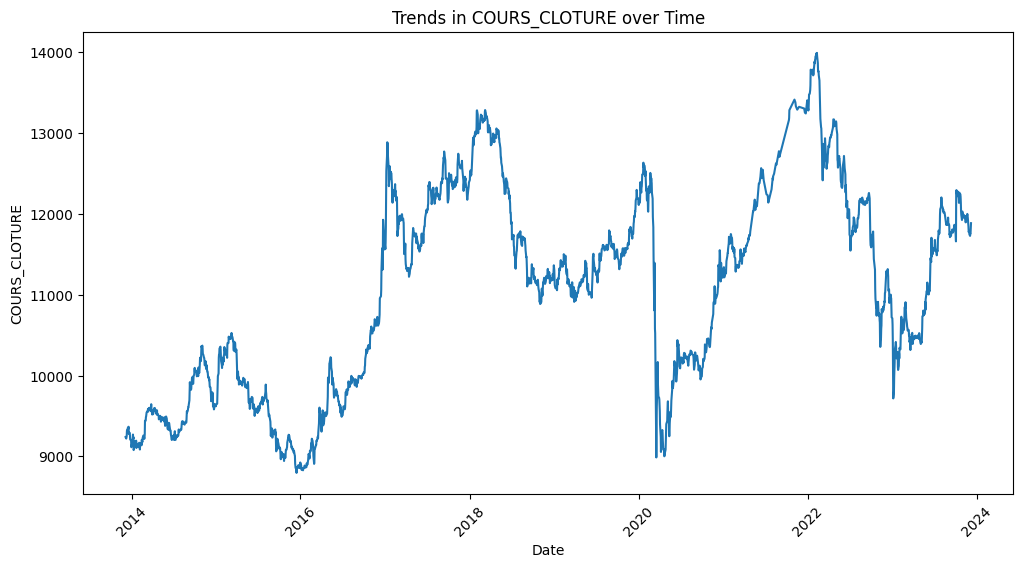

In [8]:
# Visualize trends in 'COURS_CLOTURE' over time
plt.figure(figsize=(12, 6))
sns.lineplot(x='SEANCE', y='COURS_CLOTURE', data=Indice_MASI)
plt.title('Trends in COURS_CLOTURE over Time')
plt.xlabel('Date')
plt.ylabel('COURS_CLOTURE')
plt.xticks(rotation=45)
plt.show()


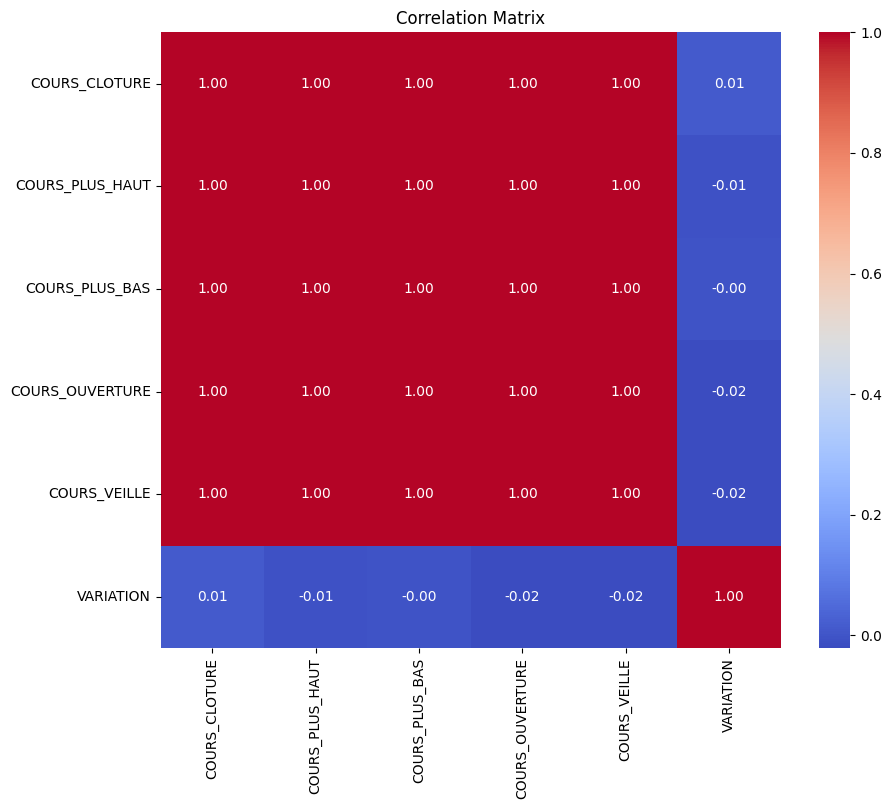

In [10]:
# Explore correlations between variables
plt.figure(figsize=(10, 8))
heatmap_data = Indice_MASI[['COURS_CLOTURE', 'COURS_PLUS_HAUT', 'COURS_PLUS_BAS', 'COURS_OUVERTURE', 'COURS_VEILLE', 'VARIATION']]
correlation_matrix = heatmap_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()